<a href="https://colab.research.google.com/github/milamazim/data-science/blob/main/Desafio_Modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os dados das bases de dados

In [ ]:
import pandas as pd # biblioteca de leitura e tratamento de dataframes

# lendo os arquivo
dados_pessoais = pd.read_excel('dados_pessoais.xlsx')
dados_pessoais.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [ ]:
estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding = 'latin-1')
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [ ]:
exp_salario = pd.read_csv('Experience-Salary.csv', sep = ',', encoding = 'latin-1')
exp_salario.head()

,client_ID,exp(in months),salary(in thousands)
0,1,18.290293,16.521825
1,2,17.023407,11.666234
2,3,26.343613,23.167255
3,4,19.105834,20.877145
4,5,27.742516,23.166236


# Preparação dos Dados

In [ ]:
dados_pessoais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [ ]:
dados_pessoais.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [ ]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
estados.describe()

,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


In [ ]:
exp_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_ID             1000 non-null   int64  
 1   exp(in months)        1000 non-null   float64
 2   salary(in thousands)  1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [ ]:
exp_salario.describe()

,client_ID,exp(in months),salary(in thousands)
count,1000.000000,1000.000000,1000.000000
mean,500.500000,26.157825,26.722597
std,288.819436,8.717091,8.844761
min,1.000000,0.697594,-1.276342
25%,250.750000,20.073600,20.531008
50%,500.500000,25.875225,26.745576
75%,750.250000,32.406986,32.615753
max,1000.000000,49.463222,55.297016


# Histogramas

In [ ]:
import matplotlib.pyplot as plt

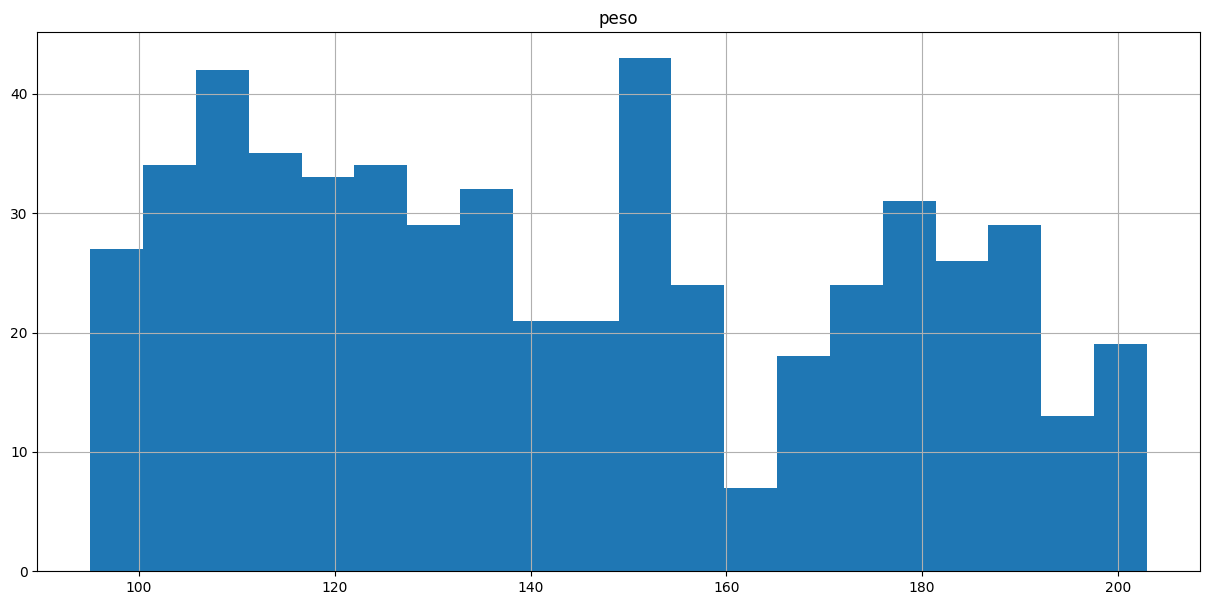

In [ ]:
dados_pessoais.hist(column='peso', figsize=(15,7), bins=20) # 15 x 7 é o tamanho da figura
plt.show()

# Analisando dados ausentes

In [ ]:
dados_pessoais.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
exp_salario.isna().sum()

client_ID               0
exp(in months)          0
salary(in thousands)    0
dtype: int64

# Ajustando dados ausentes

Mediana para variaveis numericas
Moda para variaveis categóricas

In [ ]:
mediana = dados_pessoais.peso.median()
mediana

140.0

In [ ]:
dados_pessoais.peso.fillna(mediana, inplace=True)

In [ ]:
dados_pessoais.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
dados_pessoais.count()

id_cliente    547
peso          547
colesterol    547
genero        547
id_estado     547
dtype: int64

In [ ]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [ ]:
estados.pais.fillna('Brasil', inplace=True)

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

# Junção dos dados coletados

In [ ]:
dados_pessoais[:5]

In [ ]:
estados[:5]

In [ ]:
exp_salario[:5]

In [ ]:
clientes_estados = pd.merge(dados_pessoais, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

In [ ]:
exp_salario.rename(columns={'client_ID': 'id_cliente'}, inplace=True)

In [ ]:
# realiza juncao entre clientes e salarios
base_completa = pd.merge(clientes_estados, exp_salario, on='id_cliente').sort_values('id_cliente')
base_completa

In [ ]:
base_completa.reset_index(drop=True)

# Organizando a base de dados

In [ ]:
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()
base_completa.reset_index(drop=True)

# Alternado a disposição dos dados

In [ ]:
# visualizando a alteracao antes de comitar
base_completa[['id_cliente', 'exp(in months)', 'salary(in thousands)', 'genero', 'estado', 'id_estado', 'sigla_estado', 'pais', 'peso', 'colesterol']]

In [ ]:
base_completa = base_completa[['id_cliente', 'exp(in months)', 'salary(in thousands)', 'genero', 'estado', 'id_estado', 'sigla_estado', 'pais', 'peso', 'colesterol']].reset_index(drop=True)

In [ ]:
base_completa

,id_cliente,exp(in months),salary(in thousands),genero,estado,id_estado,sigla_estado,pais,peso,colesterol
0,1,18.290293,16.521825,Masculino,Roraima,23,RR,Brasil,102.0,111
1,2,17.023407,11.666234,Masculino,Distrito Federal,7,DF,Brasil,115.0,135
2,3,26.343613,23.167255,Masculino,Amazonas,4,AM,Brasil,115.0,136
3,4,19.105834,20.877145,Feminino,Santa Catarina,24,SC,Brasil,140.0,167
4,5,27.742516,23.166236,Masculino,Sergipe,26,SE,Brasil,130.0,158
...,...,...,...,...,...,...,...,...,...,...
542,543,35.452508,40.833760,Masculino,Rondônia,22,RO,Brasil,172.0,207
543,544,36.754079,33.290301,Masculino,Acre,1,AC,Brasil,129.0,157
544,545,20.774142,26.858661,Masculino,Ceará,6,CE,Brasil,107.0,115
545,546,28.004697,37.302389,Masculino,Rio Grande do Norte,20,RN,Brasil,117.0,147


# Aplicando o método do cotovelo

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=0, init='k-means++')
    kmeans.fit(X=dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [ ]:
dados_cliente = base_completa[['exp(in months)', 'salary(in thousands)']]
dados_cliente.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [ ]:
wcss_clientes = calcular_wcss(dados_cliente)

In [ ]:
for i in range(len(wcss_clientes)):
  print(f"O cluster {i} possui valor de WCSS de: {wcss_clientes[i]}")

O cluster 0 possui valor de WCSS de: 87967.30238735827
O cluster 1 possui valor de WCSS de: 36303.65569855319
O cluster 2 possui valor de WCSS de: 22314.16478024768
O cluster 3 possui valor de WCSS de: 17010.047386559567
O cluster 4 possui valor de WCSS de: 13852.679304126328
O cluster 5 possui valor de WCSS de: 11892.54489248172
O cluster 6 possui valor de WCSS de: 10556.88082399827
O cluster 7 possui valor de WCSS de: 9379.813122262854
O cluster 8 possui valor de WCSS de: 8355.251493449257
O cluster 9 possui valor de WCSS de: 7419.639890741893


# Visualizando o gráfico do cotovelo

In [ ]:
import plotly.express as px # criacao de graficos dinamicos
import plotly.offline as py
import plotly.graph_objects as go # criacao e concatenacao de graficos

In [ ]:
grafico_wcss = px.line( x= range (1,11),
                        y= wcss_clientes
                      )

fig = go.Figure(grafico_wcss)

fig.update_layout(title= 'Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do WCSS',
                  template= 'plotly_white'
                  )

fig.show()

In [ ]:
kmeans_clientes = KMeans(n_clusters=3, random_state=0, init='k-means++')
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [ ]:
base_completa

,id_cliente,exp(in months),salary(in thousands),genero,estado,id_estado,sigla_estado,pais,peso,colesterol,cluster
0,1,18.290293,16.521825,Masculino,Roraima,23,RR,Brasil,102.0,111,1
1,2,17.023407,11.666234,Masculino,Distrito Federal,7,DF,Brasil,115.0,135,1
2,3,26.343613,23.167255,Masculino,Amazonas,4,AM,Brasil,115.0,136,2
3,4,19.105834,20.877145,Feminino,Santa Catarina,24,SC,Brasil,140.0,167,1
4,5,27.742516,23.166236,Masculino,Sergipe,26,SE,Brasil,130.0,158,2
...,...,...,...,...,...,...,...,...,...,...,...
542,543,35.452508,40.833760,Masculino,Rondônia,22,RO,Brasil,172.0,207,0
543,544,36.754079,33.290301,Masculino,Acre,1,AC,Brasil,129.0,157,0
544,545,20.774142,26.858661,Masculino,Ceará,6,CE,Brasil,107.0,115,2
545,546,28.004697,37.302389,Masculino,Rio Grande do Norte,20,RN,Brasil,117.0,147,0


# Calcula os centroides de cada cluster

In [ ]:
centroides_cluster = kmeans_clientes.cluster_centers_
centroides_cluster

array([[36.11833488, 37.42830067],
       [15.85595428, 16.00544877],
       [26.05736697, 26.52422074]])

In [ ]:
dados_cliente

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
542,35.452508,40.833760
543,36.754079,33.290301
544,20.774142,26.858661
545,28.004697,37.302389


# Visualizando os graficos

In [ ]:
def plotar_grafico(x, y, xlabel, ylabel):
  grafico = px.scatter(x= x,
                       y= y,
                       color= base_completa['cluster'])

  fig = go.Figure(grafico)

  fig.update_layout(title= 'Análise de Clusters',
                    xaxis_title= xlabel,
                    yaxis_title= ylabel)

  fig.show()

In [ ]:
x = 'exp(in months)'
y = 'salary(in thousands)'

plotar_grafico(base_completa[x], base_completa[y], x, y)

# Segmentando os clientes baseado na análise dos clusters

Vamos agrupar em 3 tipos:

- Iniciante: candidatos com baixo tempo em meses trabalhados. Salários iniciais e de entrada.
- Intermediário: candidatos com um tempo moderado em meses trabalhados. Salários correspondentes à experiência intermediária.
- Experiente: candidatos com extensa experiência em meses trabalhados. Salários mais elevados refletindo a experiência acumulada.

In [ ]:
cluster_clientes = base_completa

In [ ]:
# segmentando os clientes baseado na análise dos clusters
cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'Experiente'
cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'Iniciante'
cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'Intermediario'

In [ ]:
cluster_clientes

,id_cliente,exp(in months),salary(in thousands),genero,estado,id_estado,sigla_estado,pais,peso,colesterol,cluster,nome_cluster
0,1,18.290293,16.521825,Masculino,Roraima,23,RR,Brasil,102.0,111,1,Iniciante
1,2,17.023407,11.666234,Masculino,Distrito Federal,7,DF,Brasil,115.0,135,1,Iniciante
2,3,26.343613,23.167255,Masculino,Amazonas,4,AM,Brasil,115.0,136,2,Intermediario
3,4,19.105834,20.877145,Feminino,Santa Catarina,24,SC,Brasil,140.0,167,1,Iniciante
4,5,27.742516,23.166236,Masculino,Sergipe,26,SE,Brasil,130.0,158,2,Intermediario
...,...,...,...,...,...,...,...,...,...,...,...,...
542,543,35.452508,40.833760,Masculino,Rondônia,22,RO,Brasil,172.0,207,0,Experiente
543,544,36.754079,33.290301,Masculino,Acre,1,AC,Brasil,129.0,157,0,Experiente
544,545,20.774142,26.858661,Masculino,Ceará,6,CE,Brasil,107.0,115,2,Intermediario
545,546,28.004697,37.302389,Masculino,Rio Grande do Norte,20,RN,Brasil,117.0,147,0,Experiente


In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['exp(in months)'].describe()

count       mean       std        min        25%  \
nome_cluster  genero                                                        
Experiente    Feminino    79.0  36.153463  4.794336  27.261238  32.824593   
              Masculino   72.0  36.079791  4.779932  26.408048  32.751187   
Iniciante     Feminino    78.0  15.420453  4.520106   3.196824  12.364723   
              Masculino   73.0  16.321285  5.544881   0.697594  13.659081   
Intermediario Feminino   109.0  26.025508  4.232341  16.662708  23.293150   
              Masculino  136.0  26.082901  4.399872  16.389792  23.024379   

                               50%        75%        max  
nome_cluster  genero                                      
Experiente    Feminino   35.466144  38.655259  49.463222  
              Masculino  36.226325  38.665167  49.045090  
Iniciante     Feminino   15.378084  18.895369  25.743916  
              Masculino  17.060923  20.023587  27.848845  
Intermediario Feminino   26.074160  28.771521  37.330680  
              Masculino  25.656996  28.825777  36.811673

In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['salary(in thousands)'].describe()

count       mean       std        min        25%  \
nome_cluster  genero                                                        
Experiente    Feminino    79.0  37.024201  4.908646  28.946382  32.921709   
              Masculino   72.0  37.871688  4.953151  29.977267  34.104376   
Iniciante     Feminino    78.0  15.331567  4.763957  -1.276342  12.754820   
              Masculino   73.0  16.725487  4.500726   2.856367  14.452508   
Intermediario Feminino   109.0  26.508486  3.880458  15.999828  24.134761   
              Masculino  136.0  26.536831  3.828970  15.833870  23.940483   

                               50%        75%        max  
nome_cluster  genero                                      
Experiente    Feminino   36.316405  39.817419  52.859146  
              Masculino  37.206300  40.596145  55.297016  
Iniciante     Feminino   15.931488  18.282205  25.992450  
              Masculino  17.939585  19.788112  24.214241  
Intermediario Feminino   26.569897  29.378485  37.137573  
              Masculino  26.842447  29.314477  36.216998

In [ ]:
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Experiente,151,27,Ceará,11
Iniciante,151,27,Minas Gerais,10
Intermediario,245,27,Piauí,13


In [ ]:
cluster_clientes.groupby('nome_cluster')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Experiente,151.0,167.311258,36.863204,102.0,141.5,164.0,198.5,235.0
Iniciante,151.0,171.377483,40.270211,102.0,136.5,169.0,210.0,235.0
Intermediario,245.0,171.775510,39.856847,102.0,133.0,173.0,211.0,234.0


In [ ]:
cluster_clientes.groupby('nome_cluster')['estado'].describe()

In [ ]:
cluster_clientes.groupby('estado')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
estado,,,,,,,,
Acre,12.0,162.500000,35.186516,105.0,143.00,158.5,185.00,222.0
Alagoas,21.0,174.666667,42.046799,106.0,139.00,181.0,214.00,228.0
Amapá,21.0,169.761905,45.567428,102.0,125.00,167.0,213.00,232.0
Amazonas,25.0,164.880000,45.497546,106.0,126.00,143.0,219.00,232.0
Bahia,18.0,164.444444,38.769640,108.0,130.75,164.0,185.25,226.0
Ceará,25.0,171.400000,40.282337,110.0,134.00,172.0,209.00,231.0
Distrito Federal,22.0,175.954545,42.539032,110.0,133.50,194.0,211.75,231.0
Espírito Santo,18.0,179.111111,38.018399,105.0,165.00,180.0,217.50,227.0
Goiás,23.0,154.086957,28.316255,111.0,131.00,158.0,170.50,232.0


# Boxplot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

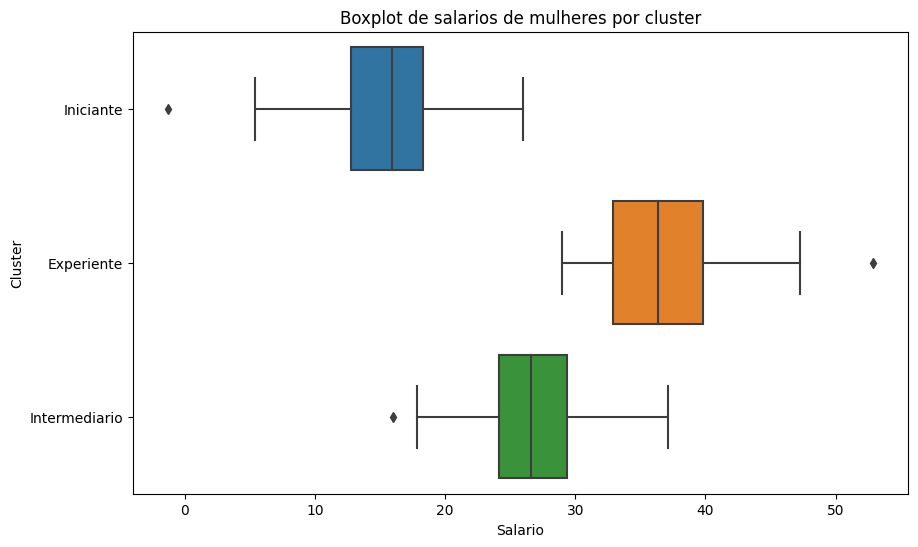

In [ ]:
df_feminino = cluster_clientes[cluster_clientes['genero'] == "Feminino"]

plt.figure(figsize=(10,6))
sns.boxplot(x='salary(in thousands)',y='nome_cluster',data=df_feminino)

plt.title('Boxplot de salarios de mulheres por cluster')
plt.ylabel('Cluster')
plt.xlabel('Salario')

plt.show()

# Histograma adicional

In [ ]:
type(cluster_clientes)

pandas.core.frame.DataFrame

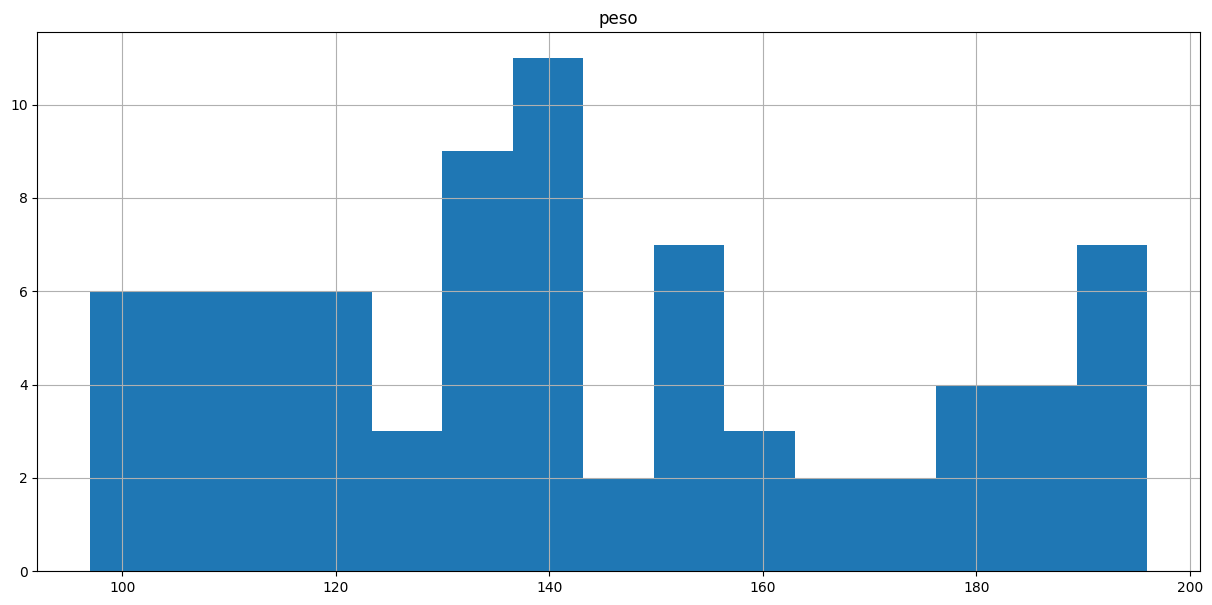

In [ ]:
df_feminino = cluster_clientes[(cluster_clientes['genero'] == "Feminino") & (cluster_clientes['nome_cluster'] == "Iniciante")]
df_feminino.hist(column='peso', figsize=(15,7), bins=15) # 15 x 7 é o tamanho da figura
plt.show()

# Exportando os dados

In [ ]:
cluster_clientes.to_csv('base_final.csv', sep = ';', encoding='latin1')